# Task 1
### Web scraping to gain company insights
### We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

### Scraping data from Skytrax
### If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

### If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Terrible Experience with Bri...
1,✅ Trip Verified | An airline that lives in the...
2,✅ Trip Verified | Check-in Desk rude and dism...
3,✅ Trip Verified | I chose British Airways espe...
4,Not Verified | I booked Premium Economy from I...


In [4]:
df

,reviews
0,✅ Trip Verified | Terrible Experience with Bri...
1,✅ Trip Verified | An airline that lives in the...
2,✅ Trip Verified | Check-in Desk rude and dism...
3,✅ Trip Verified | I chose British Airways espe...
4,Not Verified | I booked Premium Economy from I...
...,...
995,"✅ Trip Verified | \r\nBA34 KUL-LHR 6 Sept, ret..."
996,✅ Trip Verified | We flew from Los Angeles to ...
997,✅ Trip Verified | Brindisi to London. Flying ...
998,✅ Trip Verified | Chicago to London. I have f...


##### The next thing that we will do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [6]:
df

,reviews
0,Terrible Experience with British Airways. I b...
1,An airline that lives in their past glory and...
2,Check-in Desk rude and dismissive. Flight la...
3,I chose British Airways especially because I ...
4,I booked Premium Economy from INV to LAX (via...
...,...
995,"\r\nBA34 KUL-LHR 6 Sept, return BA11 LHR-SIN-..."
996,We flew from Los Angeles to Leeds Bradford vi...
997,Brindisi to London. Flying from any airport ...
998,Chicago to London. I have flown long haul ma...


#### Data preprocessing steps:

#### Cleaning the text

##### Tokenization

##### Enrichment – POS tagging

##### Stopwords removal

##### Obtaining the stem words

## Step 1: Cleaning the text

In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...
1,An airline that lives in their past glory and...,An airline that lives in their past glory and...
2,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...
3,I chose British Airways especially because I ...,I chose British Airways especially because I ...
4,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...


### Step 2: Tokenization
### Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Step 3: Enrichment – POS tagging
### Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Step 4: Stopwords removal
### Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Step 5: Obtaining the stem words
### A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

### The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [10]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),..."
1,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ..."
2,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive..."
3,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe..."
4,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV..."


In [12]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),...",Terrible Experience British Airways book fli...
1,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis B...
2,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive...",Check Desk rude dismissive Flight late seem ...
3,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe...",choose British Airways especially go travel ...
4,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV...",book Premium Economy INV LAX via LHR notify ...


In [13]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Terrible Experience with British Airways. I b...,Terrible Experience British Airways book fli...
1,An airline that lives in their past glory and...,airline live past glory head future crisis B...
2,Check-in Desk rude and dismissive. Flight la...,Check Desk rude dismissive Flight late seem ...
3,I chose British Airways especially because I ...,choose British Airways especially go travel ...
4,I booked Premium Economy from INV to LAX (via...,book Premium Economy INV LAX via LHR notify ...
...,...,...
995,"\r\nBA34 KUL-LHR 6 Sept, return BA11 LHR-SIN-...",BA KUL LHR Sept return BA LHR SIN KUL Sept f...
996,We flew from Los Angeles to Leeds Bradford vi...,fly Los Angeles Leeds Bradford via Heathrow ...
997,Brindisi to London. Flying from any airport ...,Brindisi London Flying airport include Ryana...
998,Chicago to London. I have flown long haul ma...,Chicago London fly long haul many time BA Vi...


### Sentiment Analysis using VADER
### VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

### Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [14]:
!pip install vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),...",Terrible Experience British Airways book fli...,0.8698,Positive
1,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis B...,-0.7351,Negative
2,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive...",Check Desk rude dismissive Flight late seem ...,-0.6705,Negative
3,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe...",choose British Airways especially go travel ...,-0.8074,Negative
4,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV...",book Premium Economy INV LAX via LHR notify ...,-0.5719,Negative


In [16]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    497
Negative    395
Neutral     108
Name: Analysis, dtype: int64

### Visual Representation

([<matplotlib.patches.Wedge at 0x25d69ee8be0>,
 [Text(0.01036707179294032, 1.0999511461071534, 'Positive'),
  Text(-0.3758612265358838, -1.0337931796964717, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.005654766432512902, 0.5999733524220836, '49.7%'),
  Text(-0.20501521447411838, -0.5638871889253481, '39.5%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

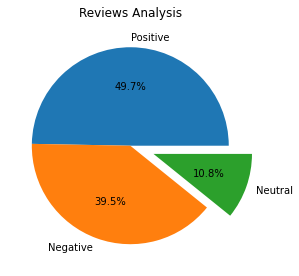

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [18]:
df.to_csv("BA_reviews.csv")

### Wordcloud
#### Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

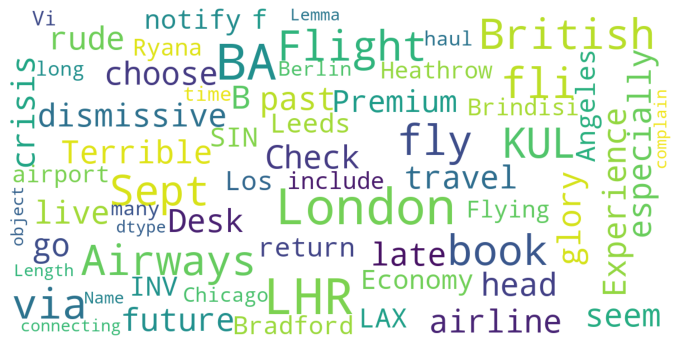

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)